In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans , DBSCAN

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.drop('CustomerID' , axis=1 , inplace=True)

In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

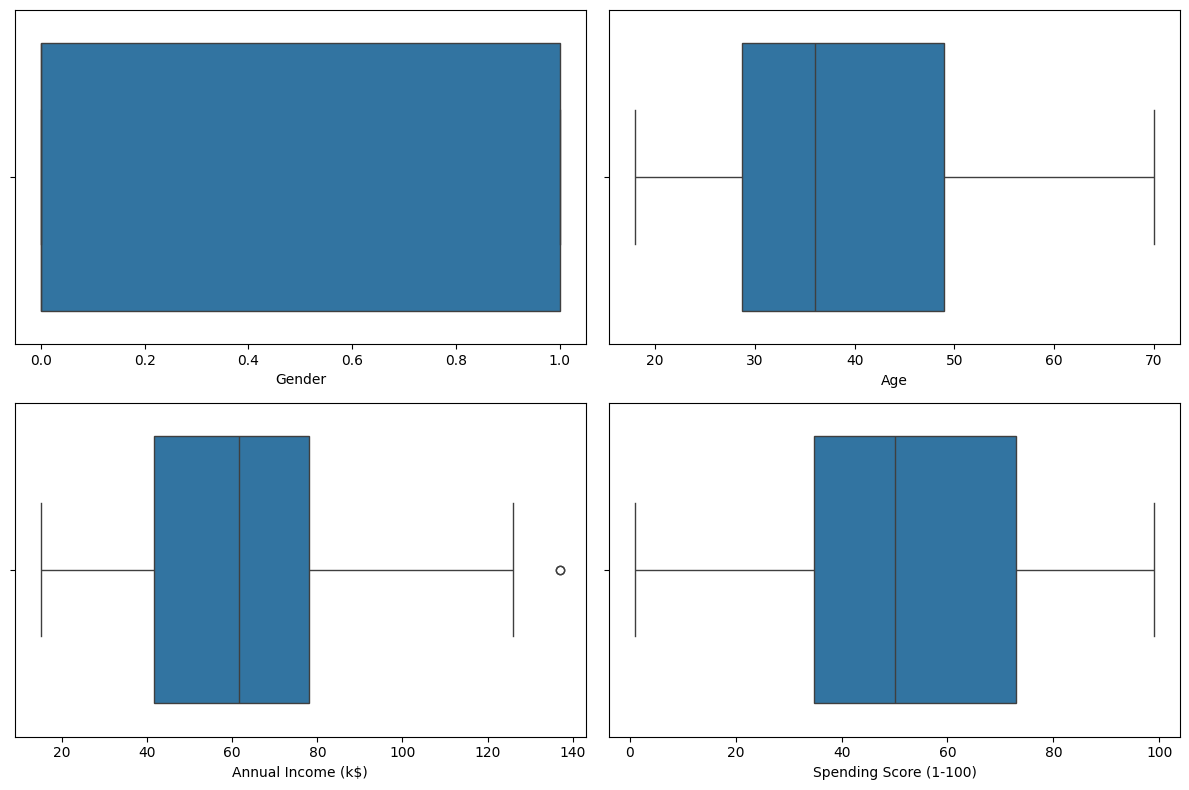

In [8]:
plt.figure(figsize=(12,8))
for i,col in enumerate(df.columns , 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

In [9]:
st = StandardScaler()
for col in df.columns:
    df[col] = st.fit_transform(df[[col]])

In [10]:
from itertools import combinations
feature_pairs = list(combinations(df.columns, 2))
feature_pairs

[('Gender', 'Age'),
 ('Gender', 'Annual Income (k$)'),
 ('Gender', 'Spending Score (1-100)'),
 ('Age', 'Annual Income (k$)'),
 ('Age', 'Spending Score (1-100)'),
 ('Annual Income (k$)', 'Spending Score (1-100)')]

<Figure size 1200x800 with 0 Axes>

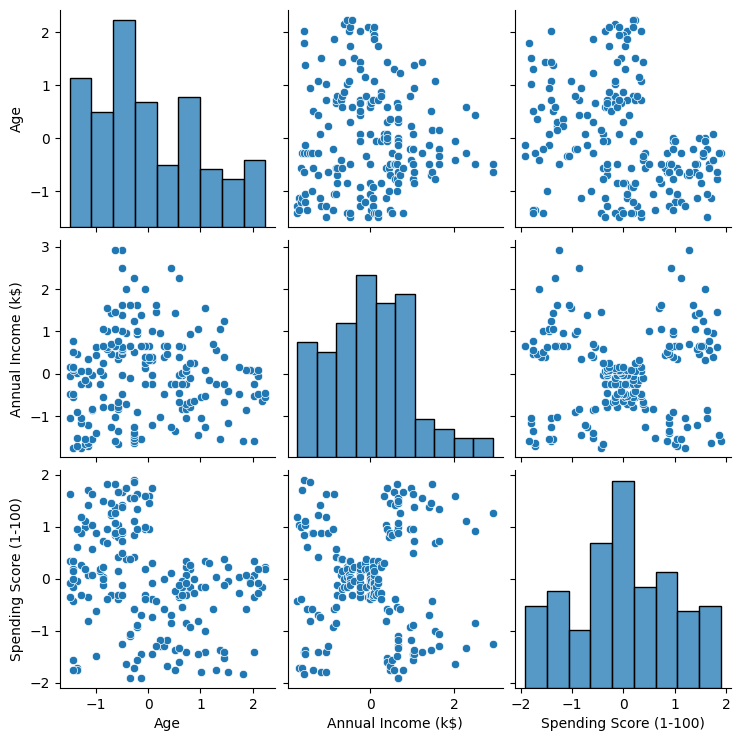

In [20]:
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show()

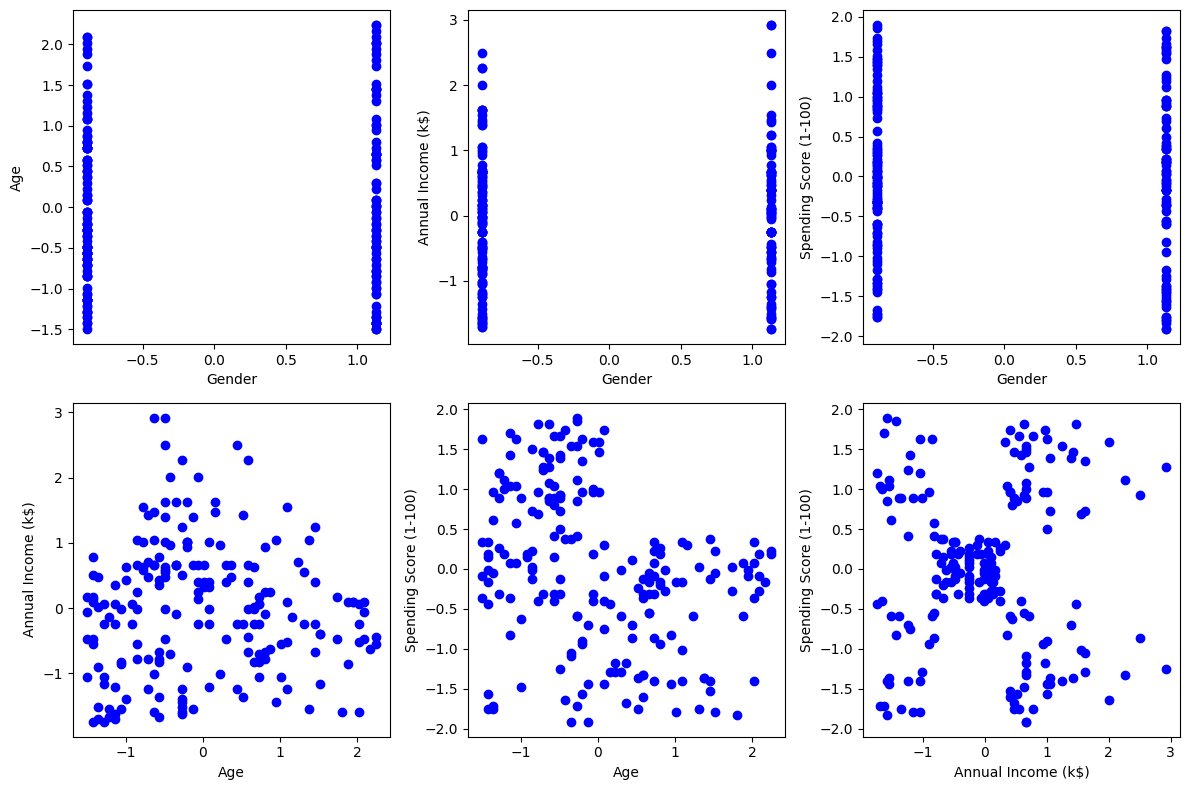

In [12]:
plt.figure(figsize=(12,8))
for i, (f1 , f2) in enumerate(feature_pairs,1):
    plt.subplot(2,3,i)
    plt.scatter(df[f1] , df[f2] , color = 'b')
    plt.xlabel(f1)
    plt.ylabel(f2)
plt.tight_layout()
plt.show()

In [13]:
df.drop(columns='Gender' , inplace=True)

In [14]:
feature_pairs = list(combinations(df.columns, 2))

In [15]:
from sklearn.metrics import silhouette_score

results = {}

for f1, f2 in feature_pairs:
    best_score = -1
    best_k = None
    for k in range(2, 11):  # من 2 لحد 10
        km = KMeans(n_clusters=k, random_state=42)
        labels = km.fit_predict(df[[f1, f2]])
        score = silhouette_score(df[[f1, f2]], labels)

        if score > best_score:
            best_score = score
            best_k = k
    
    results[(f1, f2)] = (best_k, best_score)

# نعرض أفضل Feature Pair
best_pair = max(results, key=lambda x: results[x][1])
print(f"أفضل اتنين Features: {best_pair} بعدد كلسترز {results[best_pair][0]} والـ Silhouette = {results[best_pair][1]:.3f}")

أفضل اتنين Features: ('Annual Income (k$)', 'Spending Score (1-100)') بعدد كلسترز 5 والـ Silhouette = 0.555


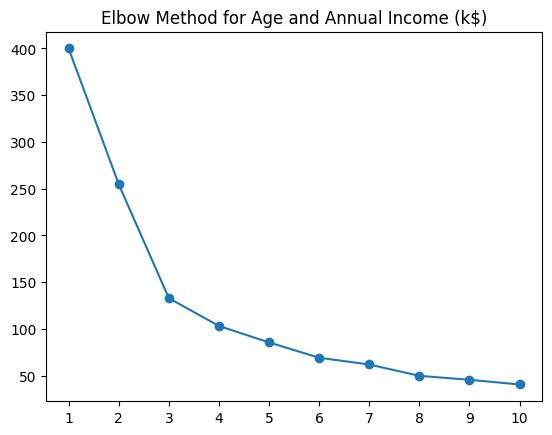

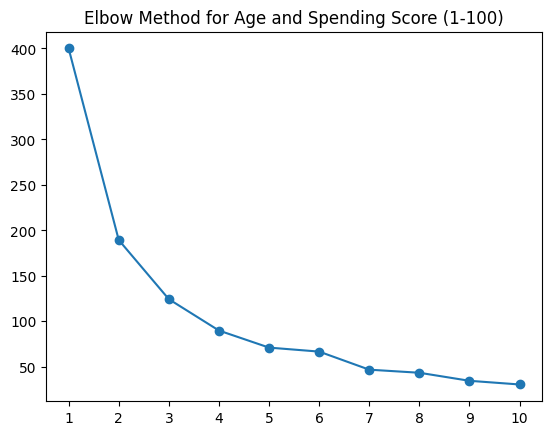

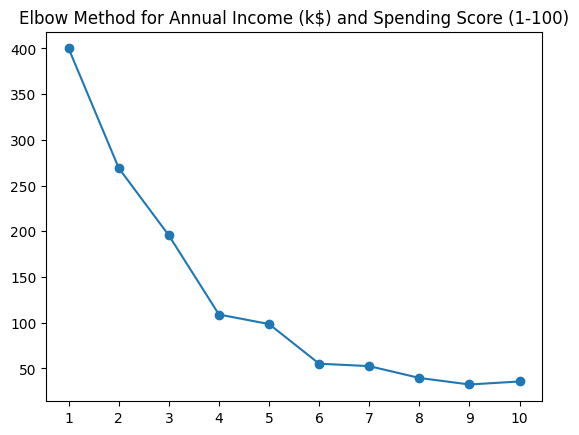

In [16]:
for f1 , f2 in feature_pairs:
    score = []
    for j in range(1,11):
        km = KMeans(n_clusters=j)
        km.fit(df[[f1 , f2]])
        score.append(km.inertia_)
    plt.xticks(range(1,11))
    plt.plot(range(1,11) , score , marker='o')
    plt.title(f'Elbow Method for {f1} and {f2}')
    plt.show()

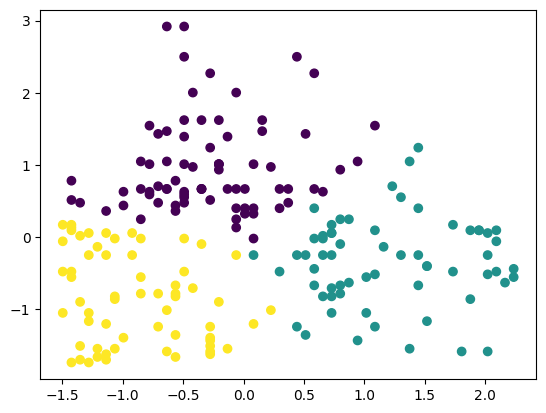

In [17]:
km = KMeans(n_clusters=3)
km.fit(df[['Age' , 'Annual Income (k$)']])
y_pred = km.predict(df[['Age' , 'Annual Income (k$)']])
plt.scatter(df['Age'] , df['Annual Income (k$)'] , c=y_pred)
plt.show()

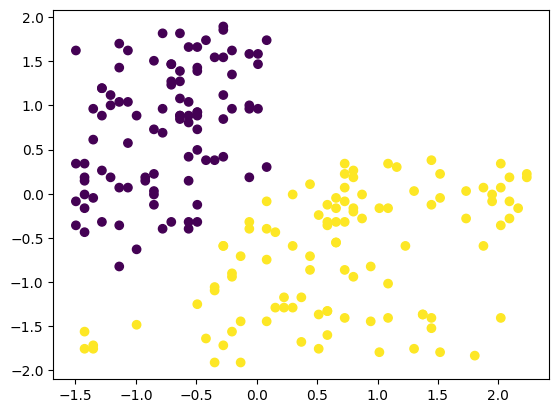

In [18]:
km = KMeans(n_clusters=2)
km.fit(df[['Age' , 'Spending Score (1-100)']])
plt.scatter(df['Age'] , df['Spending Score (1-100)'] , c=km.labels_)
plt.show()

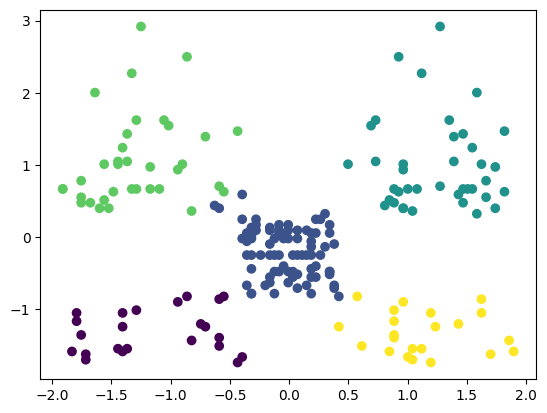

In [19]:
km = KMeans(n_clusters=5)
km.fit(df[['Spending Score (1-100)' , 'Annual Income (k$)']])
plt.scatter(df['Spending Score (1-100)'] , df['Annual Income (k$)'] , c=km.labels_)
plt.show()